# MULTIVARIATE LINEAR REGRESSION

## Large Stores

In [1]:
# Import packages
import pandas as pd  
from pandasql import sqldf
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import exponweib
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import power_divergence
from scipy.stats import expon
from scipy.stats import lognorm
from scipy.stats import skewnorm
from scipy.stats import gamma
from scipy.stats import kstest
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut 

In [2]:
# Import Buxton_Challenge_Data.csv for a year's worth of data 
file1 = 'Buxton_Challenge_Data.csv'
buxtonFile = pd.read_csv(file1, sep = ',')

# Create a DataFrame
dataset = sqldf('''SELECT * FROM buxtonFile where SQFT >= 23000;''')
dataset.head(15)

,SID,OPEN_YEAR,DENSITY_CLASS,DENSITY_CLASS_2,DENSITY_CLASS_3,REGION,REGION_SA,REGION_MA,REGION_ENC,STATE,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
0,21266491,NaN,2,1,0,SA,1,0,0,WV,...,95.04,94.38,91.29,93.65,93.28,89.92,3262854.94,723.47,2629199.03,510.38
1,21266492,NaN,2,1,0,SA,1,0,0,WV,...,88.49,81.97,87.78,86.80,79.71,85.79,3745254.61,704.30,4714278.64,501.17
2,21266494,NaN,2,1,0,MA,0,1,0,PA,...,92.95,89.92,93.15,89.33,87.28,91.56,4615043.23,728.06,4933560.86,552.78
3,21266495,NaN,3,0,1,SA,1,0,0,WV,...,93.99,95.66,96.62,91.94,94.36,95.57,5234084.09,643.69,5956571.33,460.80
4,21266496,1983.0,2,1,0,MA,0,1,0,PA,...,94.95,91.82,94.09,94.28,89.81,92.62,5213824.66,800.61,2599706.69,503.14
5,21266497,1984.0,2,1,0,SA,1,0,0,MD,...,96.78,93.90,94.78,95.75,84.17,88.18,4235039.57,812.68,5430226.19,537.17
6,21266498,1985.0,2,1,0,SA,1,0,0,WV,...,96.04,95.03,95.91,94.65,93.82,95.01,3047761.34,682.62,3323540.34,450.89
7,21266499,1986.0,2,1,0,ENC,0,0,1,OH,...,95.62,95.13,94.61,94.63,93.82,91.26,3540146.55,713.33,4296301.15,493.88
8,21266500,1987.0,3,0,1,MA,0,1,0,PA,...,96.42,91.56,87.68,95.78,89.82,85.27,8887719.17,700.44,5641977.41,480.37
9,21266501,1988.0,2,1,0,ENC,0,0,1,OH,...,84.15,87.36,91.96,82.05,85.09,90.40,6169111.00,539.99,5241580.63,422.46


In [3]:
# Explore data (rows, columns)
dataset.shape

(49, 452)

In [4]:
# Descriptive Stats
dataset.describe()

,SID,OPEN_YEAR,DENSITY_CLASS,DENSITY_CLASS_2,DENSITY_CLASS_3,REGION_SA,REGION_MA,REGION_ENC,SQFT,SALES_2016,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
count,4.900000e+01,45.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.500000e+01,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,4.900000e+01,49.000000
mean,2.215482e+07,1999.000000,2.653061,0.346939,0.653061,0.346939,0.265306,0.346939,56287.877551,7.819803e+06,...,87.020000,85.125102,83.748776,84.404082,82.225918,80.860408,7.167321e+06,638.539592,7.421895e+06,466.675306
std,1.592039e+06,9.474847,0.480929,0.480929,0.480929,0.480929,0.446071,0.480929,8314.068184,1.757714e+06,...,11.711413,11.723720,11.905547,12.672887,12.304685,12.454474,2.784475e+06,72.718156,4.215394e+06,32.389324
min,2.126649e+07,1980.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44312.000000,5.590959e+06,...,39.470000,36.650000,41.370000,35.200000,34.980000,37.510000,3.047761e+06,502.730000,2.599707e+06,401.040000
25%,2.126650e+07,1991.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49680.000000,6.527510e+06,...,81.930000,81.880000,76.710000,78.540000,77.010000,73.280000,4.958349e+06,592.930000,4.933561e+06,445.810000
50%,2.126652e+07,1999.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,53951.000000,7.534766e+06,...,92.140000,88.820000,87.780000,89.670000,85.090000,85.270000,7.132101e+06,634.650000,6.854043e+06,464.140000
75%,2.284764e+07,2010.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60720.000000,8.730941e+06,...,94.210000,93.260000,91.960000,92.860000,91.480000,89.920000,8.589378e+06,682.620000,8.589220e+06,488.290000
max,2.614837e+07,2011.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,86695.000000,1.330439e+07,...,97.470000,96.820000,96.630000,96.350000,95.340000,95.570000,1.341490e+07,812.680000,2.562182e+07,552.780000


In [5]:
# Check for nulls
dataset.isnull().any()

SID                        False
OPEN_YEAR                   True
DENSITY_CLASS              False
DENSITY_CLASS_2            False
DENSITY_CLASS_3            False
REGION                     False
REGION_SA                  False
REGION_MA                  False
REGION_ENC                 False
STATE                      False
SQFT                       False
SALES_2016                  True
AGE_ADULT18P_8TO           False
AGE_ADULT18P_16TO          False
AGE_BABYBOOM5069_8TO       False
AGE_BABYBOOM5069_16TO      False
AGE_COLLG1821_8TO          False
AGE_COLLG1821_16TO         False
AGE_DRINKADULT21P_8TO      False
AGE_DRINKADULT21P_16TO     False
AGE_ELDERLY7085P_8TO       False
AGE_ELDERLY7085P_16TO      False
AGE_ELEMIDSCHL0514_8TO     False
AGE_ELEMIDSCHL0514_16TO    False
AGE_GENX4049_8TO           False
AGE_GENX4049_16TO          False
AGE_GENY2139_8TO           False
AGE_GENY2139_16TO          False
AGE_GENZ0020_8TO           False
AGE_GENZ0020_16TO          False
          

In [6]:
# Remove nulls (if any)
dataset = dataset[4:].fillna(method='ffill')
dataset.head(15)

,SID,OPEN_YEAR,DENSITY_CLASS,DENSITY_CLASS_2,DENSITY_CLASS_3,REGION,REGION_SA,REGION_MA,REGION_ENC,STATE,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
4,21266496,1983.0,2,1,0,MA,0,1,0,PA,...,94.95,91.82,94.09,94.28,89.81,92.62,5213824.66,800.61,2599706.69,503.14
5,21266497,1984.0,2,1,0,SA,1,0,0,MD,...,96.78,93.90,94.78,95.75,84.17,88.18,4235039.57,812.68,5430226.19,537.17
6,21266498,1985.0,2,1,0,SA,1,0,0,WV,...,96.04,95.03,95.91,94.65,93.82,95.01,3047761.34,682.62,3323540.34,450.89
7,21266499,1986.0,2,1,0,ENC,0,0,1,OH,...,95.62,95.13,94.61,94.63,93.82,91.26,3540146.55,713.33,4296301.15,493.88
8,21266500,1987.0,3,0,1,MA,0,1,0,PA,...,96.42,91.56,87.68,95.78,89.82,85.27,8887719.17,700.44,5641977.41,480.37
9,21266501,1988.0,2,1,0,ENC,0,0,1,OH,...,84.15,87.36,91.96,82.05,85.09,90.40,6169111.00,539.99,5241580.63,422.46
10,21266502,1989.0,2,1,0,SA,1,0,0,WV,...,88.70,87.39,84.71,85.27,84.43,82.01,3823354.43,667.41,7484507.64,488.29
11,21266503,1989.0,3,0,1,MA,0,1,0,PA,...,72.03,64.57,74.58,66.04,57.40,68.63,11579621.78,608.68,15928773.90,446.82
12,21266504,1990.0,3,0,1,MA,0,1,0,PA,...,88.97,88.82,83.41,85.94,84.32,78.14,7132100.63,621.61,8147266.64,434.89
13,21266505,1990.0,2,1,0,SA,1,0,0,VA,...,86.87,81.91,86.86,82.48,75.77,82.32,4506029.32,592.93,6880663.60,421.42


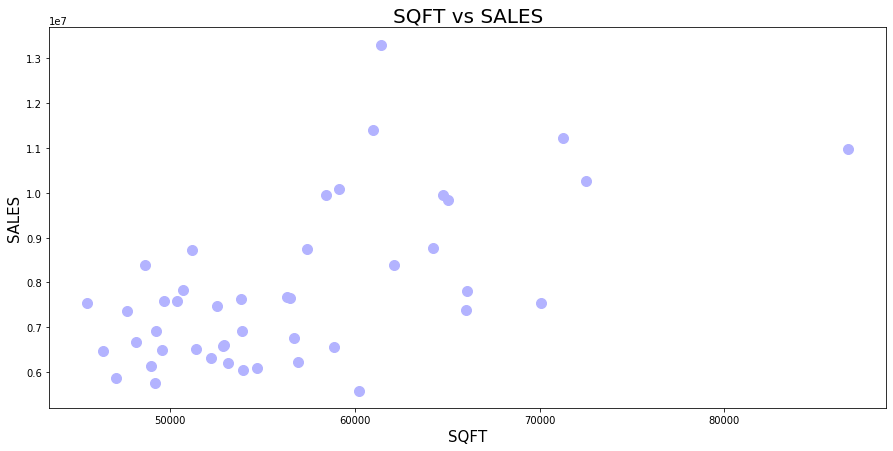

In [7]:
# Plot sales vs sqft scatter plot
plt.figure(figsize=(15,7))
plt.scatter(dataset['SQFT'],dataset['SALES_2016'],s=100,marker='o',color='#b3b3ff')
plt.title('SQFT vs SALES',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('SALES',fontsize=15)  
plt.show()

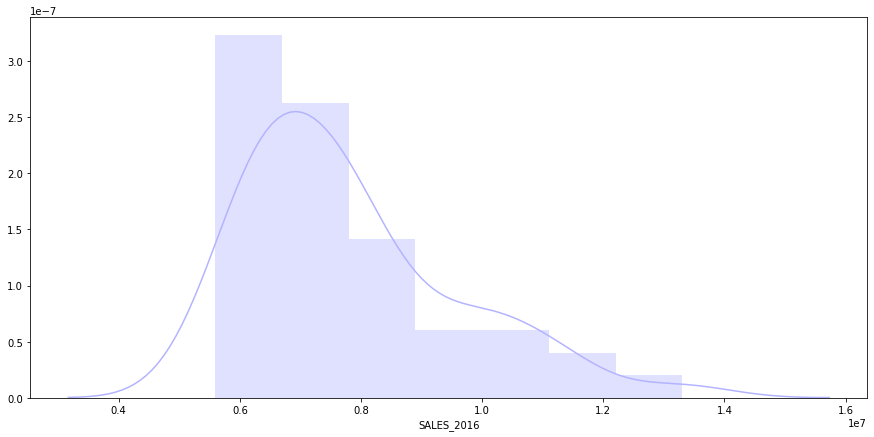

In [8]:
# Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
sns.distplot(dataset['SALES_2016'],color='#b3b3ff')

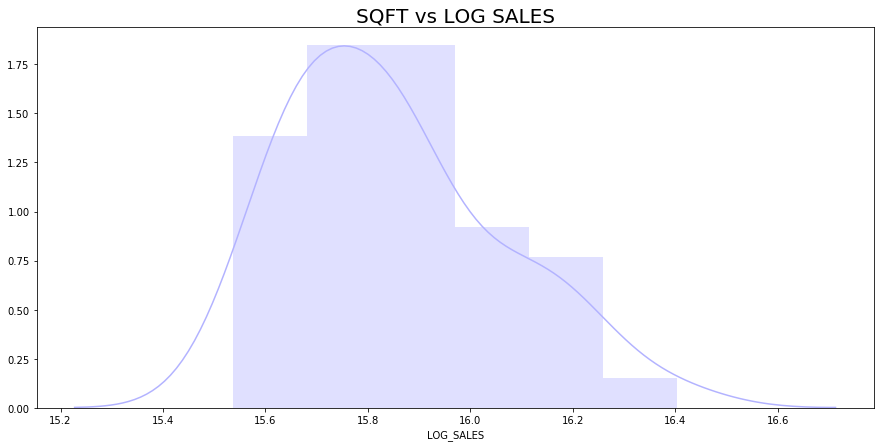

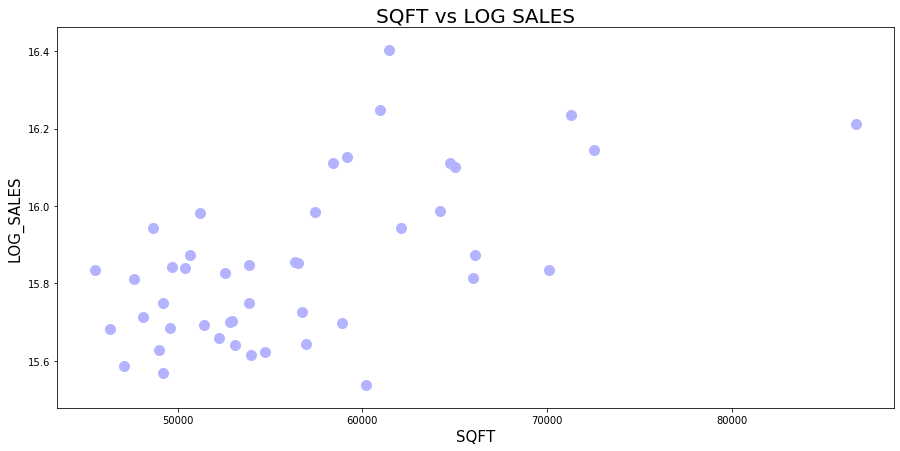

In [9]:
# Transformation is not needed for small stores

# Transform the dependent variable with lognormal
dataset['LOG_SALES']=np.log(dataset['SALES_2016'])
dataset.head()

# Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
plt.title('SQFT vs LOG SALES',fontsize=20)  
sns.distplot(dataset['LOG_SALES'],color='#b3b3ff')

# Plot lognormal sales vs sqft scatter plot
plt.figure(figsize=(15,7))
plt.scatter(dataset['SQFT'],dataset['LOG_SALES'],s=100,marker='o',color='#b3b3ff')
plt.title('SQFT vs LOG SALES',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('LOG_SALES',fontsize=15)  
plt.show()

In [10]:
# Set dependent and independent variables
X = dataset[['SQFT','DENSITY_CLASS_2',
             'XRACE_WHTHH_16TO','HVAL_MED_COLADJ_16TO']]
y = dataset['LOG_SALES']

In [11]:
# Split data 80% training 20% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# K fold cross validation
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [0 1 2 3 4 5 6 7 8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [ 9 10 11 12 13 14 15 16 17]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [18 19 20 21 22 23 24 25 26]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 36 37 38 39 40 41 42 43 44] TEST: [27 28 29 30 31 32 33 34 35]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] TEST: [36 37 38 39 40 41 42 43 44]


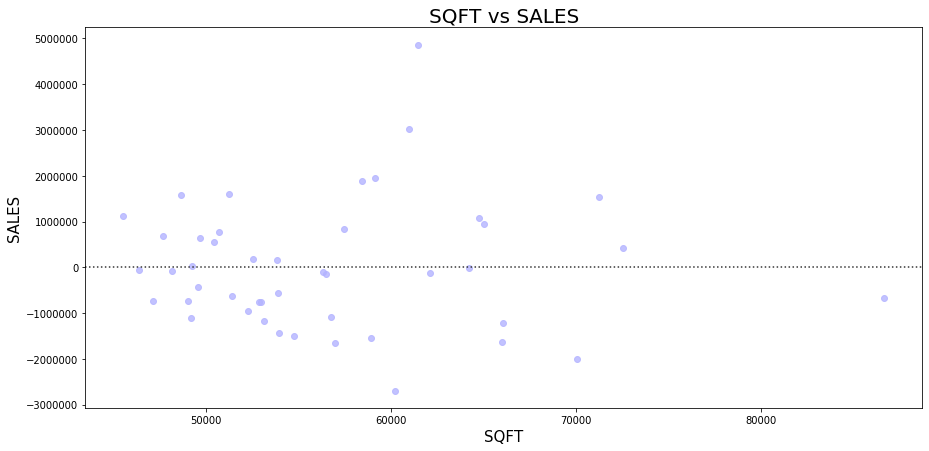

In [13]:
# Residual plot of the regression between sqft and sales
plt.figure(figsize=(15,7))
sns.residplot(x='SQFT', y='SALES_2016', data=dataset, color='#b3b3ff')
plt.title('SQFT vs SALES',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('SALES',fontsize=15) 
plt.show()

In [14]:
# Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
regressor

result = regressor.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: -168.44%


In [15]:
# Find the most optimal variables for the regression model
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
SQFT,1.272783e-05
DENSITY_CLASS_2,1.118375e-01
XRACE_WHTHH_16TO,-2.764489e-04
HVAL_MED_COLADJ_16TO,6.511678e-07


In [16]:
#To retrieve the intercept:
yintercept=regressor.intercept_
print('Y Intercept', "{:,.2f}".format(yintercept))

#For retrieving the slope:
slope=regressor.coef_
print('Coefficient', slope)

# Get results
r_sq = regressor.score(X_train, y_train)
print('Coefficient of Determination:', "{:,.2f}".format(r_sq))

Y Intercept 15.03
Coefficient [ 1.27278316e-05  1.11837522e-01 -2.76448916e-04  6.51167760e-07]
Coefficient of Determination: 0.42


In [17]:
# Predict test data
y_pred = regressor.predict(X_test)

In [18]:
# Difference between actual and predicted 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
40,15.567881,15.694832
41,15.827993,15.815176
42,15.628709,15.773898
43,15.727143,15.803388
44,15.641354,15.787186
45,15.703956,15.898934
46,15.642642,15.856596
47,15.681769,15.749923
48,15.812488,15.740087


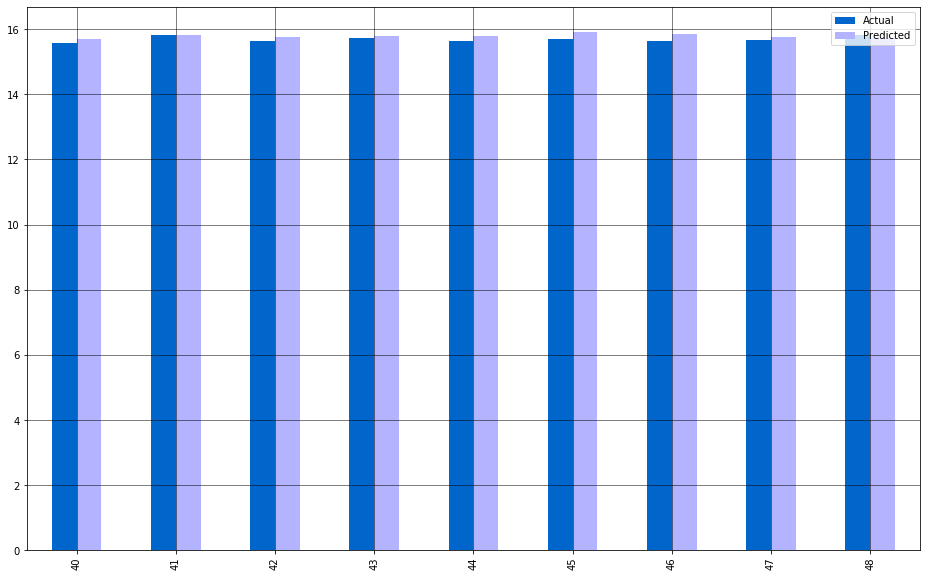

In [19]:
# Visualize the difference between actual and predicted value
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10),color=('#0066cc','#b3b3ff'))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
# # Plot regression line
# plt.figure(figsize=(15,7))
# plt.scatter(X_test, y_test,  color='#0066cc',s=100,marker='o')
# plt.plot(X_test, y_pred, color='#b3b3ff', linewidth=3)
# plt.title('Predicted Regression Line',fontsize=20)  
# plt.xlabel('SQFT',fontsize=15)  
# plt.ylabel('SALES',fontsize=15)
# plt.show()

In [21]:
# Evaluate performance by analyzing mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE)
print('Mean Absolute Error:', "{:,.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))  
print('Mean Squared Error:', "{:,.2f}".format(metrics.mean_squared_error(y_test, y_pred))) 
print('Root Mean Squared Error:', "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.12
Mean Squared Error: 0.02
Root Mean Squared Error: 0.13


In [22]:
# Fit regression model (using the natural log of one of the regressors)
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              LOG_SALES   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1410.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                    2.68e-43
Time:                        23:31:54   Log-Likelihood:                         -77.248
No. Observations:                  45   AIC:                                      162.5
Df Residuals:                      41   BIC:                                      169.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [23]:
# Predict sales for the 5 stores 
reg = sqldf('''SELECT SQFT
,DENSITY_CLASS_2
,XRACE_WHTHH_16TO
,HVAL_MED_COLADJ_16TO
FROM buxtonFile where SALES_2016 is null;''')

n=0
predlist=[]
for x in range(5): 
    predlist.append(yintercept+(slope[0]*reg['SQFT'].iloc[n])+(slope[1]*reg['DENSITY_CLASS_2'].iloc[n])+(slope[2]*reg['XRACE_WHTHH_16TO'].iloc[n])+(slope[3]*reg['HVAL_MED_COLADJ_16TO'].iloc[n]))
    n+=1

reg['LMODEL_SALES_PREDICTED']=predlist
reg.head()

,SQFT,DENSITY_CLASS_2,XRACE_WHTHH_16TO,HVAL_MED_COLADJ_16TO,LMODEL_SALES_PREDICTED
0,44312.0,1,91.29,88350.00,15.733377
1,47425.0,1,87.78,185068.51,15.836949
2,17710.0,1,94.20,198031.63,15.465408
3,59989.0,1,93.15,97666.05,15.938463
4,60720.0,0,96.62,110840.00,15.843549


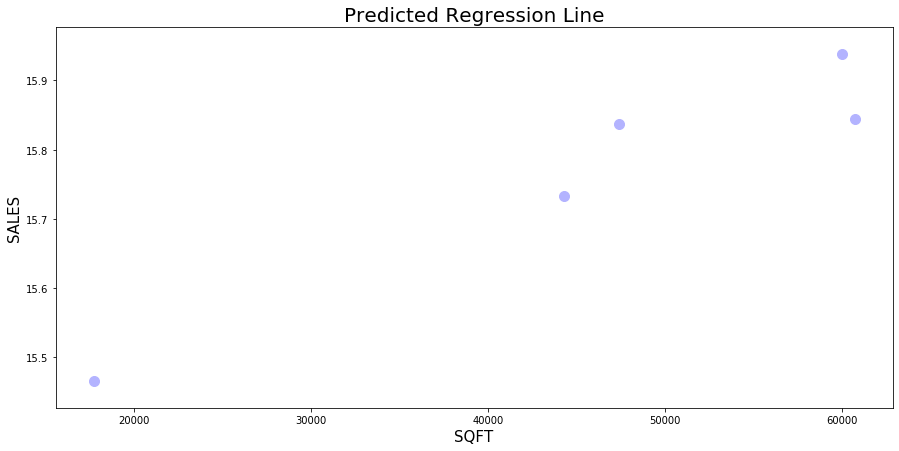

In [24]:
# Plot regression line
plt.figure(figsize=(15,7))
plt.scatter(reg['SQFT'], reg['LMODEL_SALES_PREDICTED'], color='#b3b3ff',s=100,marker='o')
# plt.plot(reg['SQFT'], reg['LMODEL_SALES_PREDICTED'], color='#b3b3ff', linewidth=3)
plt.title('Predicted Regression Line',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('SALES',fontsize=15)
plt.show()

# MULTILINEAR REGRESSION 

## Small Stores

In [25]:
# Import packages
import pandas as pd  
from pandasql import sqldf
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import exponweib
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import power_divergence
from scipy.stats import expon
from scipy.stats import lognorm
from scipy.stats import skewnorm
from scipy.stats import gamma
from scipy.stats import kstest
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold 

In [26]:
# Import Buxton_Challenge_Data.csv for a year's worth of data 
file1 = 'Buxton_Challenge_Data.csv'
buxtonFile = pd.read_csv(file1, sep = ',')

# Create a DataFrame
dataset = sqldf('''SELECT * FROM buxtonFile where SQFT <= 23000;''')
dataset.head(70)

,SID,OPEN_YEAR,DENSITY_CLASS,DENSITY_CLASS_2,DENSITY_CLASS_3,REGION,REGION_SA,REGION_MA,REGION_ENC,STATE,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
0,21266493,NaN,2,1,0,SA,1,0,0,WV,...,96.14,93.11,94.20,94.70,92.13,92.71,2767007.12,723.39,2259801.14,460.22
1,21266530,1992.0,3,0,1,SA,1,0,0,MD,...,66.73,69.77,77.59,58.46,61.75,72.12,6290932.87,528.81,10021297.72,420.55
2,21266533,1994.0,4,0,0,SA,1,0,0,MD,...,44.14,46.37,55.57,39.67,40.99,49.77,7250145.91,313.20,16228032.28,459.14
3,21266535,1994.0,4,0,0,SA,1,0,0,MD,...,75.63,48.81,28.03,70.81,48.22,27.65,8282648.63,375.73,13865147.64,487.46
4,21266546,1996.0,4,0,0,SA,1,0,0,VA,...,70.32,68.87,61.56,63.92,61.62,54.52,6316723.52,377.23,7455916.64,482.23
5,21266554,1997.0,2,1,0,SA,1,0,0,DE,...,71.63,67.77,68.32,68.13,64.37,65.41,7208278.46,605.26,4896570.20,441.10
6,21266556,1997.0,3,0,1,SA,1,0,0,NC,...,55.24,54.12,54.94,50.44,50.24,49.90,9330586.63,480.84,19788171.56,494.30
7,21266558,1997.0,3,0,1,SA,1,0,0,NC,...,85.67,81.67,86.98,81.19,77.99,83.77,6834876.13,536.77,11081208.13,420.72
8,21266563,1998.0,2,1,0,SA,1,0,0,NC,...,85.81,85.09,73.48,82.74,81.53,68.38,6924028.09,625.58,7036508.25,469.30
9,21266565,1998.0,3,0,1,SA,1,0,0,NC,...,49.78,51.31,47.58,46.43,47.05,44.11,9599469.77,623.21,9895135.57,526.77


In [27]:
# Explore data (rows,columns)
dataset.shape

(22, 452)

In [28]:
# Descriptive stats
dataset.describe()

,SID,OPEN_YEAR,DENSITY_CLASS,DENSITY_CLASS_2,DENSITY_CLASS_3,REGION_SA,REGION_MA,REGION_ENC,SQFT,SALES_2016,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
count,2.200000e+01,21.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.000000,2.100000e+01,...,22.00000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,2.200000e+01,22.000000
mean,2.126657e+07,1998.190476,2.772727,0.363636,0.500000,0.863636,0.0,0.0,14199.227273,2.412955e+06,...,69.12000,67.929545,67.550000,64.623182,63.684091,63.685909,6.967002e+06,553.979545,9.232529e+06,470.909545
std,2.902634e+01,2.676174,0.685344,0.492366,0.511766,0.351250,0.0,0.0,2553.491148,2.914631e+05,...,18.76452,17.350315,16.689773,18.624595,17.333489,16.959131,2.398269e+06,101.498202,5.163736e+06,28.323728
min,2.126649e+07,1992.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,10580.000000,2.161265e+06,...,26.82000,34.610000,28.030000,25.330000,32.900000,27.650000,2.767007e+06,313.200000,2.259801e+06,420.550000
25%,2.126655e+07,1997.000000,2.000000,0.000000,0.000000,1.000000,0.0,0.0,12238.250000,2.242085e+06,...,56.80500,52.012500,56.922500,52.032500,48.725000,51.055000,6.227555e+06,518.910000,5.202285e+06,459.410000
50%,2.126657e+07,1999.000000,3.000000,0.000000,0.500000,1.000000,0.0,0.0,13836.500000,2.342536e+06,...,72.17500,69.520000,69.115000,67.150000,65.145000,65.755000,6.879452e+06,593.120000,7.536789e+06,471.290000
75%,2.126659e+07,1999.000000,3.000000,1.000000,1.000000,1.000000,0.0,0.0,15285.000000,2.417817e+06,...,84.39500,80.730000,78.332500,79.942500,76.440000,74.820000,8.171566e+06,620.087500,1.097567e+07,486.152500
max,2.126661e+07,2003.000000,4.000000,1.000000,1.000000,1.000000,0.0,0.0,21122.000000,3.230843e+06,...,96.14000,93.110000,94.200000,94.700000,92.130000,92.710000,1.152821e+07,723.390000,1.978817e+07,531.240000


In [29]:
# Check for nulls
dataset.isnull().any()

SID                        False
OPEN_YEAR                   True
DENSITY_CLASS              False
DENSITY_CLASS_2            False
DENSITY_CLASS_3            False
REGION                     False
REGION_SA                  False
REGION_MA                  False
REGION_ENC                 False
STATE                      False
SQFT                       False
SALES_2016                  True
AGE_ADULT18P_8TO           False
AGE_ADULT18P_16TO          False
AGE_BABYBOOM5069_8TO       False
AGE_BABYBOOM5069_16TO      False
AGE_COLLG1821_8TO          False
AGE_COLLG1821_16TO         False
AGE_DRINKADULT21P_8TO      False
AGE_DRINKADULT21P_16TO     False
AGE_ELDERLY7085P_8TO       False
AGE_ELDERLY7085P_16TO      False
AGE_ELEMIDSCHL0514_8TO     False
AGE_ELEMIDSCHL0514_16TO    False
AGE_GENX4049_8TO           False
AGE_GENX4049_16TO          False
AGE_GENY2139_8TO           False
AGE_GENY2139_16TO          False
AGE_GENZ0020_8TO           False
AGE_GENZ0020_16TO          False
          

In [30]:
# Remove nulls (if any)
dataset = dataset[1:].fillna(method='ffill')
dataset.head(90)

,SID,OPEN_YEAR,DENSITY_CLASS,DENSITY_CLASS_2,DENSITY_CLASS_3,REGION,REGION_SA,REGION_MA,REGION_ENC,STATE,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
1,21266530,1992.0,3,0,1,SA,1,0,0,MD,...,66.73,69.77,77.59,58.46,61.75,72.12,6290932.87,528.81,10021297.72,420.55
2,21266533,1994.0,4,0,0,SA,1,0,0,MD,...,44.14,46.37,55.57,39.67,40.99,49.77,7250145.91,313.20,16228032.28,459.14
3,21266535,1994.0,4,0,0,SA,1,0,0,MD,...,75.63,48.81,28.03,70.81,48.22,27.65,8282648.63,375.73,13865147.64,487.46
4,21266546,1996.0,4,0,0,SA,1,0,0,VA,...,70.32,68.87,61.56,63.92,61.62,54.52,6316723.52,377.23,7455916.64,482.23
5,21266554,1997.0,2,1,0,SA,1,0,0,DE,...,71.63,67.77,68.32,68.13,64.37,65.41,7208278.46,605.26,4896570.20,441.10
6,21266556,1997.0,3,0,1,SA,1,0,0,NC,...,55.24,54.12,54.94,50.44,50.24,49.90,9330586.63,480.84,19788171.56,494.30
7,21266558,1997.0,3,0,1,SA,1,0,0,NC,...,85.67,81.67,86.98,81.19,77.99,83.77,6834876.13,536.77,11081208.13,420.72
8,21266563,1998.0,2,1,0,SA,1,0,0,NC,...,85.81,85.09,73.48,82.74,81.53,68.38,6924028.09,625.58,7036508.25,469.30
9,21266565,1998.0,3,0,1,SA,1,0,0,NC,...,49.78,51.31,47.58,46.43,47.05,44.11,9599469.77,623.21,9895135.57,526.77
10,21266574,1998.0,3,0,1,SA,1,0,0,DE,...,79.83,76.80,63.98,73.28,70.42,58.99,11448248.23,560.10,18441991.33,477.33


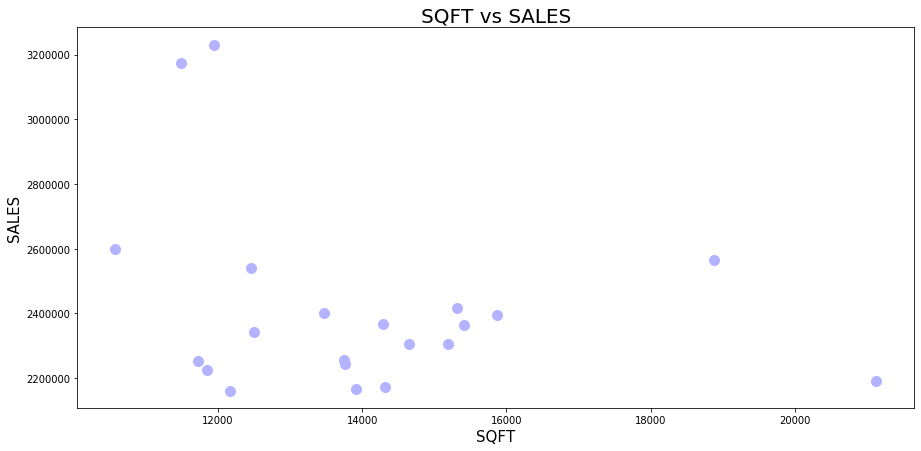

In [31]:
# Plot sales vs sqft scatter plot
plt.figure(figsize=(15,7))
plt.scatter(dataset['SQFT'],dataset['SALES_2016'],s=100,marker='o',color='#b3b3ff')
plt.title('SQFT vs SALES',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('SALES',fontsize=15)  
plt.show()

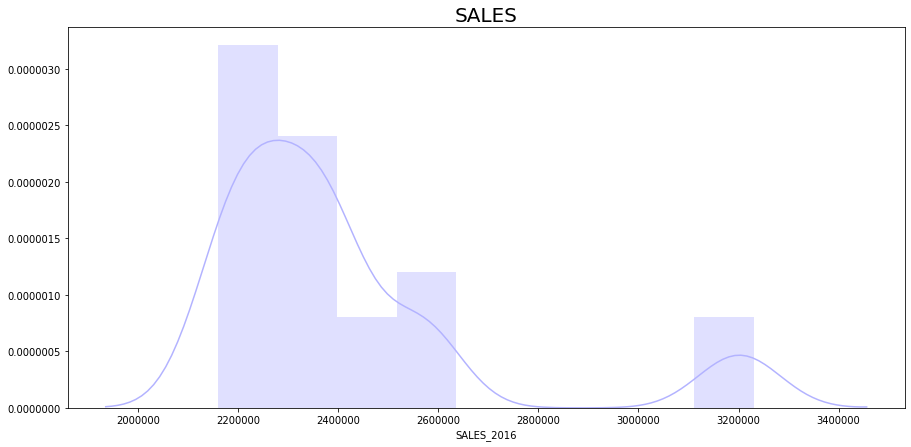

In [32]:
# Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
plt.title('SALES',fontsize=20)  
sns.distplot(dataset['SALES_2016'],color='#b3b3ff')

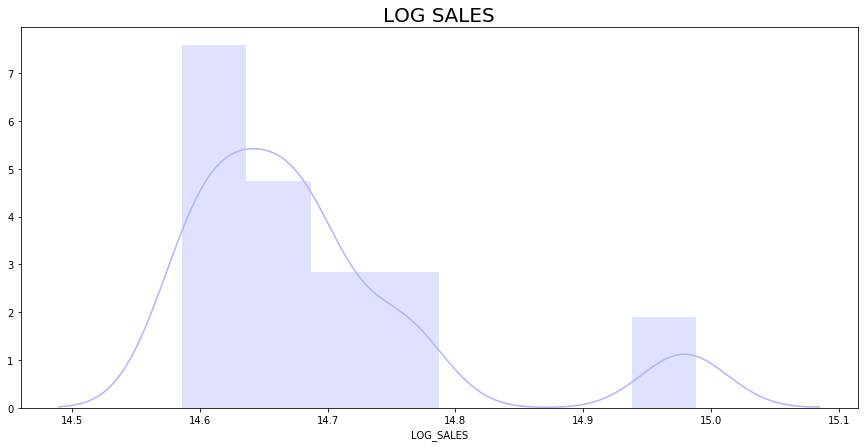

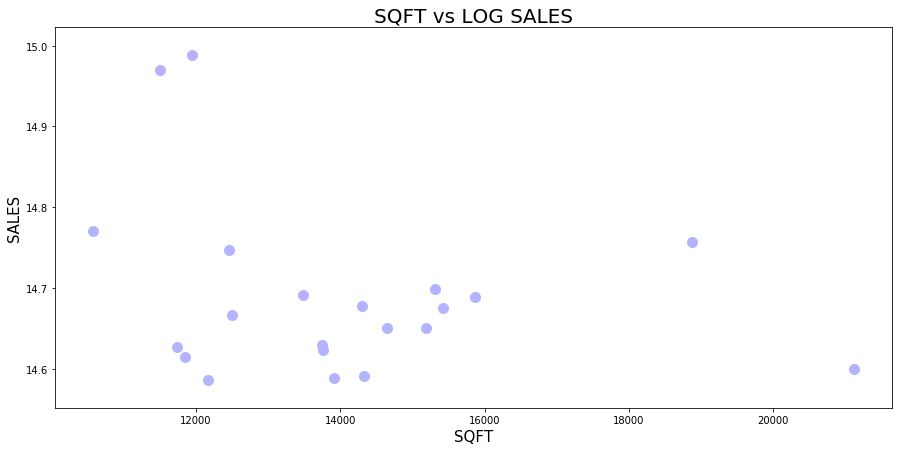

In [33]:
# Transform the dependent variable with lognormal
dataset['LOG_SALES']=np.log(dataset['SALES_2016'])
dataset.head()

# Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
plt.title('LOG SALES',fontsize=20)  
sns.distplot(dataset['LOG_SALES'],color='#b3b3ff')

# Plot lognormal sales vs sqft scatter plot
plt.figure(figsize=(15,7))
plt.scatter(dataset['SQFT'],dataset['LOG_SALES'],s=100,marker='o',color='#b3b3ff')
plt.title('SQFT vs LOG SALES',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('SALES',fontsize=15)  
plt.show()

In [118]:
# Set dependent and independent variables
X = dataset[['AWMNSGRLS_8TO'
,'XRACE_ASIAHH_16TO'
,'XAGE_MIDLFE3544_16TO']]
y = dataset['LOG_SALES']

In [119]:
# Split data 80% training 20% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
# K fold cross validation
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] TEST: [0 1 2 3 4]
TRAIN: [ 0  1  2  3  4  9 10 11 12 13 14 15 16 17 18 19 20] TEST: [5 6 7 8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 13 14 15 16 17 18 19 20] TEST: [ 9 10 11 12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 17 18 19 20] TEST: [13 14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19 20]


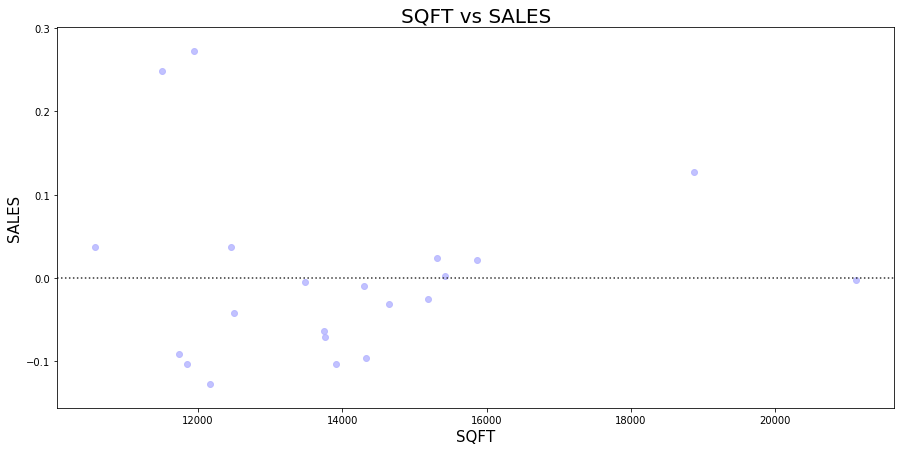

In [121]:
# Residual plot of the regression between sqft and sales
plt.figure(figsize=(15,7))
sns.residplot(x='SQFT', y='LOG_SALES', data=dataset, color='#b3b3ff')
plt.title('SQFT vs SALES',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('SALES',fontsize=15) 
plt.show()

In [122]:
# Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
regressor

result = regressor.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: -97.44%


In [123]:
# Find the most optimal variables for the regression model
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
AWMNSGRLS_8TO,0.000642
XRACE_ASIAHH_16TO,0.012516
XAGE_MIDLFE3544_16TO,-0.004068


In [124]:
#To retrieve the intercept:
yintercept=regressor.intercept_
print('Y Intercept', "{:,.2f}".format(yintercept))

#For retrieving the slope:
slope=regressor.coef_
print('Coefficient', slope)

# Get results
r_sq = regressor.score(X_train, y_train)
print('Coefficient of Determination:', "{:,.2f}".format(r_sq))

Y Intercept 14.27
Coefficient [ 0.00064183  0.01251566 -0.00406766]
Coefficient of Determination: 0.63


In [125]:
# Predict test data
y_pred = regressor.predict(X_test)

In [126]:
# Difference between actual and predicted 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
18,14.627162,14.610001
19,14.757354,14.640999
20,14.698376,14.664091
21,14.666745,14.612909


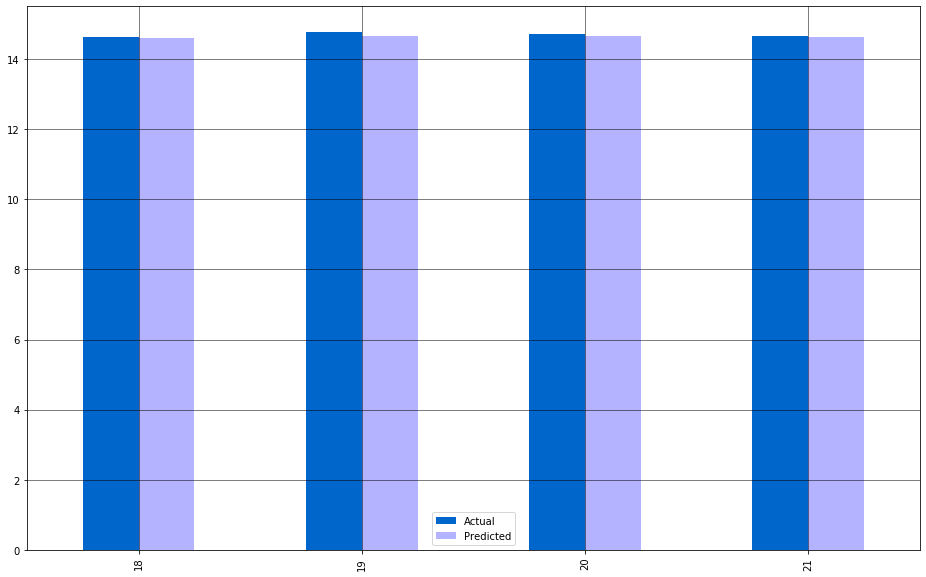

In [127]:
# Visualize the difference between actual and predicted value
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10),color=('#0066cc','#b3b3ff'))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [128]:
# Evaluate performance by analyzing mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE)
print('Mean Absolute Error:', "{:,.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))  
print('Mean Squared Error:', "{:,.2f}".format(metrics.mean_squared_error(y_test, y_pred))) 
print('Root Mean Squared Error:', "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.06
Mean Squared Error: 0.00
Root Mean Squared Error: 0.07


In [129]:
# Fit regression model (using the natural log of one of the regressors)
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              LOG_SALES   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1340.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                    2.45e-21
Time:                        09:41:43   Log-Likelihood:                         -29.392
No. Observations:                  21   AIC:                                      64.78
Df Residuals:                      18   BIC:                                      67.92
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [130]:
# Predict sales for the 5 stores 
reg = sqldf('''SELECT AWMNSGRLS_8TO
,XRACE_ASIAHH_16TO
,XAGE_MIDLFE3544_16TO
,SQFT
FROM buxtonFile where SALES_2016 is null;''')

n=0
predlist=[]
for x in range(5): 
    predlist.append(yintercept+(slope[0]*reg['AWMNSGRLS_8TO'].iloc[n])+
                    (slope[1]*reg['XRACE_ASIAHH_16TO'].iloc[n])+
                   (slope[2]*reg['XAGE_MIDLFE3544_16TO'].iloc[n]))
    n+=1

reg['SMODEL_SALES_PREDICTED']=predlist
reg.head()

,AWMNSGRLS_8TO,XRACE_ASIAHH_16TO,XAGE_MIDLFE3544_16TO,SQFT,SMODEL_SALES_PREDICTED
0,546.24,0.29,11.52,44312.0,14.578723
1,510.50,0.99,12.54,47425.0,14.560396
2,486.26,0.57,12.34,17710.0,14.540395
3,558.79,0.35,11.90,59989.0,14.585984
4,510.78,0.51,12.07,60720.0,14.556480


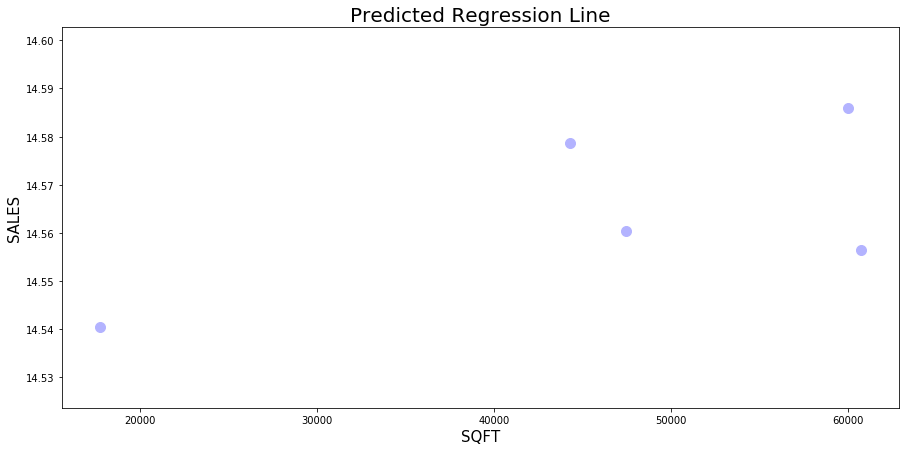

In [131]:
# Plot regression line
plt.figure(figsize=(15,7))
plt.scatter(reg['SQFT'], reg['SMODEL_SALES_PREDICTED'], color='#b3b3ff',s=100,marker='o')
# plt.plot(reg['SQFT'], reg['SALES_PREDICTED'], color='#b3b3ff', linewidth=3)
plt.title('Predicted Regression Line',fontsize=20)  
plt.xlabel('SQFT',fontsize=15)  
plt.ylabel('SALES',fontsize=15)
plt.show()